In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/breast_cancer.csv')


In [ ]:
df['has_cancer'] = df['has_cancer'].map({'No':0, 'Yes':1})

In [ ]:
X = df.drop('has_cancer', axis=1)
y = df['has_cancer']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
feat1 = 'fatigue'
feat2 = 'weight_loss'
X_2d = df[[feat1, feat2]]
y_2d = df['has_cancer']

In [ ]:
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_2d, y_2d)

KNeighborsClassifier()

In [ ]:
import numpy as np
h = 0.1
x_min, x_max = X_2d[feat1].min() - 1, X_2d[feat1].max() + 1
y_min, y_max = X_2d[feat2].min() - 1, X_2d[feat2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [ ]:
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

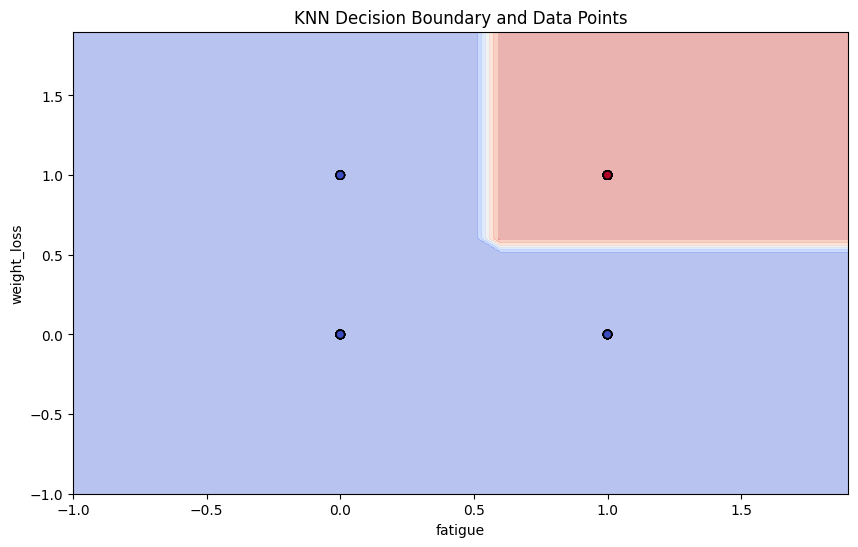

In [ ]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_2d[feat1], X_2d[feat2], c=y_2d, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title('KNN Decision Boundary and Data Points')
plt.show()